##### <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:130%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="text-align:center; padding: 10px; color:white;">
Customer Segmentation And Personality Analysis
</p>
</div>

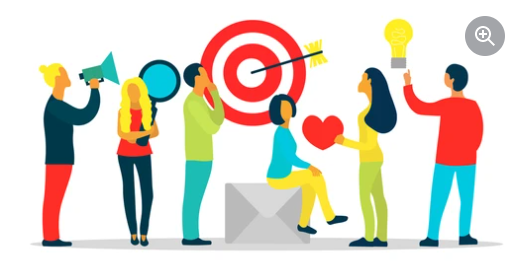

## About The Dataset

People<br>
* ID: Customer's unique identifier<br>
* Year_Birth: Customer's birth year<br>
* Education: Customer's education level<br>
* Marital_Status: Customer's marital status<br>
* Income: Customer's yearly household income<br>
* Kidhome: Number of children in customer's household<br>
* Teenhome: Number of teenagers in customer's household<br>
* Dt_Customer: Date of customer's enrollment with the company<br>
* Recency: Number of days since customer's last purchase<br>
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br>

Products<br>
* MntWines: Amount spent on wine in last 2 years<br>
* MntFruits: Amount spent on fruits in last 2 years<br>
* MntMeatProducts: Amount spent on meat in last 2 years<br>
* MntFishProducts: Amount spent on fish in last 2 years<br>
* MntSweetProducts: Amount spent on sweets in last 2 years<br>
* MntGoldProds: Amount spent on gold in last 2 years<br>

Promotion<br>
* NumDealsPurchases: Number of purchases made with a discount<br>
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

Place<br>
* NumWebPurchases: Number of purchases made through the company’s website<br>
* NumCatalogPurchases: Number of purchases made using a catalogue<br>
* NumStorePurchases: Number of purchases made directly in stores<br>
* NumWebVisitsMonth: Number of visits to company’s website in the last month<br>

## Importing Libraries, Metrics, Tools and Models 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

### Loading The Data

In [2]:
df = pd.read_csv(r"D:\Learning\Imarticus-Practise-Sets\Customer_Segmentation_Project\marketing_campaign.csv", sep="\t")

### Exploratory Data Analysis

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   
5  09-09-2013       16       520         42               98                0   
6  13-11-2012       34       235         65              164               50   
7  08-05-2013       32        76         10               56                3   
8  06-06-2013       19        14          0               24                3   
9  13-03-2014       68        28          0                6                1   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   
5                42            14                  2                6   
6                49            27                  4                7   
7                 1            23                  2                4   
8                 3             2                  1                3   
9                 1            13                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   
5                    4                 10                  6             0   
6                    3                  7                  6             0   
7                    0                  4                  8             0   
8                    0                  2                  9             0   
9                    0                  0                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0        

In [5]:
# Shape Of the Dataset
print('No. of Rows:',df.shape[0])
print("No. of Columns:",df.shape[1])

No. of Rows: 2240
No. of Columns: 29


### Checking the dtypes of columns' and how many non-null values there are in those columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Getting the statistical summary of dataset.

In [7]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

### Handling Missing Value And Duplicate

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Income Column has 24 null values

<AxesSubplot:>

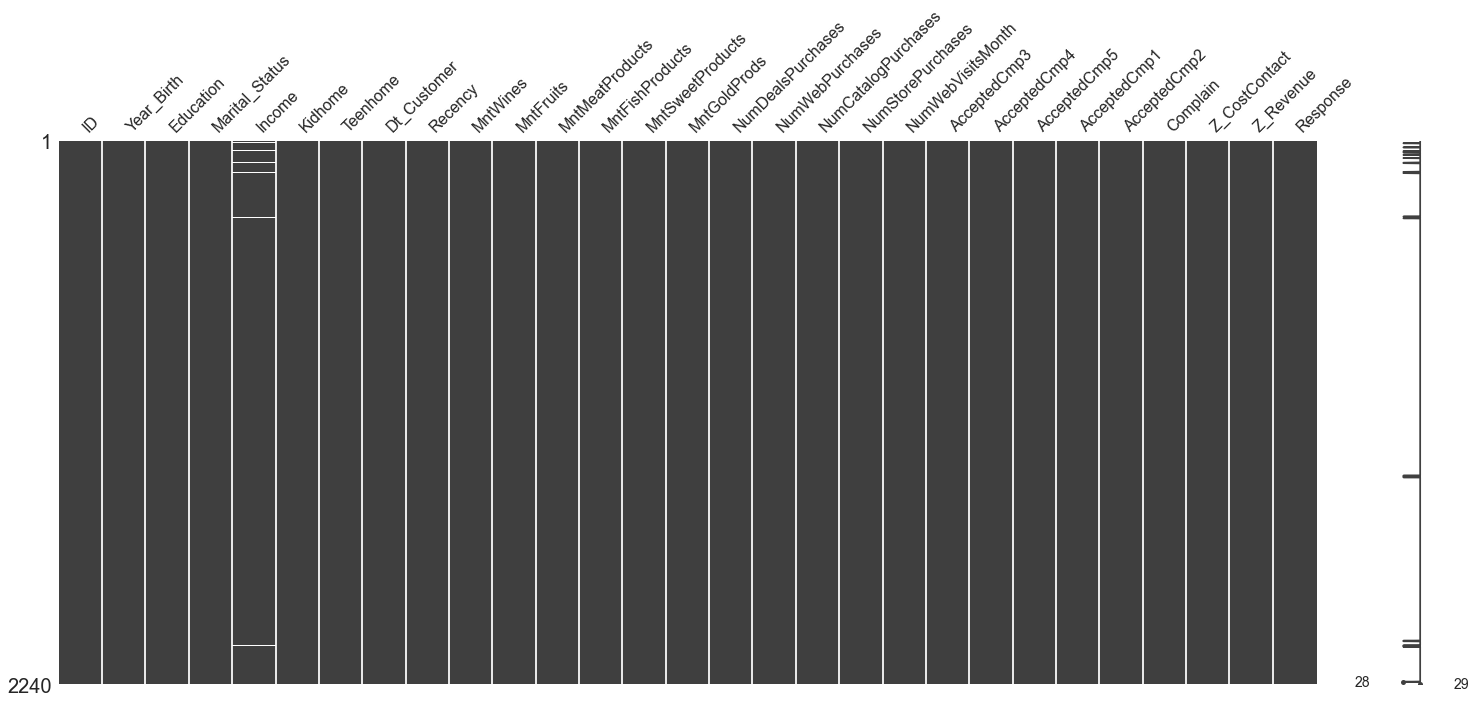

In [9]:
msno.matrix(df)

#### Filling the missing values in column "Income" with the median of that particular column.



In [10]:
df["Income"].fillna(df["Income"].median(), inplace=True)

#### Checking for duplicate data

In [11]:
df.duplicated().sum() 

0

## Feature Engineering

In [12]:
Age = 2022 - df['Year_Birth']
df.insert(1,"Age",Age)
df.head(10)

ID  Age  Year_Birth   Education Marital_Status   Income  Kidhome  \
0  5524   65        1957  Graduation         Single  58138.0        0   
1  2174   68        1954  Graduation         Single  46344.0        1   
2  4141   57        1965  Graduation       Together  71613.0        0   
3  6182   38        1984  Graduation       Together  26646.0        1   
4  5324   41        1981         PhD        Married  58293.0        1   
5  7446   55        1967      Master       Together  62513.0        0   
6   965   51        1971  Graduation       Divorced  55635.0        0   
7  6177   37        1985         PhD        Married  33454.0        1   
8  4855   48        1974         PhD       Together  30351.0        1   
9  5899   72        1950         PhD       Together   5648.0        1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0  04-09-2012       58       635         88              546   
1         1  08-03-2014       38        11          1                6   
2         0  21-08-2013       26       426         49              127   
3         0  10-02-2014       26        11          4               20   
4         0  19-01-2014       94       173         43              118   
5         1  09-09-2013       16       520         42               98   
6         1  13-11-2012       34       235         65              164   
7         0  08-05-2013       32        76         10               56   
8         0  06-06-2013       19        14          0               24   
9         1  13-03-2014       68        28          0                6   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   
5                0                42            14                  2   
6               50                49            27                  4   
7                3                 1            23                  2   
8                3                 3             2                  1   
9                1                 1            13                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   
5                6                    4                 10                  6   
6                7                    3                  7                  6   
7                4                    0                  4                  8   
8                3                    0                  2                  9   
9                1                    0                  0                 20   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0

In [13]:
Total_Spent = (df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds'])
df.insert(15,'Total_Spent',Total_Spent) # Inserting new Total spent by customer into single column

In [14]:
PurchaseNum = (df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]) # Concating the number of purchases from different places into single column.
df.insert(20,'PurchaseNum',PurchaseNum) # Inserting new purchase number column

Children = df["Kidhome"] + df["Teenhome"] # Concating number of children into a single column
df.insert(8,'Children',Children) # Inserting new Children column

Total_campaigns_accepted = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df["Response"]
df.insert(26,"Total_campaigns_accepted",Total_campaigns_accepted)

df["Marital_Status"] = df["Marital_Status"].replace({"Together": "Married", "Alone": "Single", "Absurd": "Single",
                                                     "Divorced": "Single", "Widow": "Single", "Divorced": "Single", "YOLO": "Single"})

df['Education'] = df['Education'].replace({'Graduation':'UG', 'Master':'PG', '2n Cycle':'UG', 'PhD': 'PG', 'Basic':'UG'})

### Renaming Some Column names

In [15]:
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
df.columns

Index(['ID', 'Age', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Children', 'Dt_Customer', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Total_Spent', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'PurchaseNum', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'Total_campaigns_accepted', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

### Calculating Duration of Customer enrolled with company

In [16]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) # Converting the Dt_Customer column to date col.
duration_list = []
for i in df["Dt_Customer"]:
    duration_list.append(max(df["Dt_Customer"]).date() - i.date())
    
dayscustomerfor = duration_list    
df.insert(9,'daysCustomerFor',dayscustomerfor)

In [17]:
df["daysCustomerFor"] = df["daysCustomerFor"].apply(lambda x: int(str(x).split(" ")[0]))

In [18]:
df.head()

ID  Age  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524   65        1957        UG         Single  58138.0        0         0   
1  2174   68        1954        UG         Single  46344.0        1         1   
2  4141   57        1965        UG        Married  71613.0        0         0   
3  6182   38        1984        UG        Married  26646.0        1         0   
4  5324   41        1981        PG        Married  58293.0        1         0   

   Children  daysCustomerFor Dt_Customer  Recency  Wines  Fruits  Meat  Fish  \
0         0              971  2012-04-09       58    635      88   546   172   
1         2              125  2014-08-03       38     11       1     6     2   
2         0              472  2013-08-21       26    426      49   127   111   
3         1               65  2014-10-02       26     11       4    20    10   
4         1              321  2014-01-19       94    173      43   118    46   

   Sweets  Total_Spent  Gold  NumDealsPurchases  NumWebPurchases  \
0      88         1617    88                  3                8   
1       1           27     6                  2                1   
2      21          776    42                  1                8   
3       3           53     5                  2                2   
4      27          422    15                  5                5   

   NumCatalogPurchases  PurchaseNum  NumStorePurchases  NumWebVisitsMonth  \
0                   10           22                  4                  7   
1                    1            4                  2                  5   
2                    2           20                 10                  4   
3                    0            6                  4                  6   
4                    3           14                  6                  5   

   AcceptedCmp3  AcceptedCmp4  Total_campaigns_accepted  AcceptedCmp5  \
0             0             0                         1             0   
1             0             0                         0             0   
2             0             0                         0             0   
3             0             0                         0             0   
4             0             0                         0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0             0         0              3         11         1  
1             0             0         0              3         11         0  
2             0             0         0              3         11         0  
3             0             0         0              3         11         0  
4             0             0         0              3         11         0

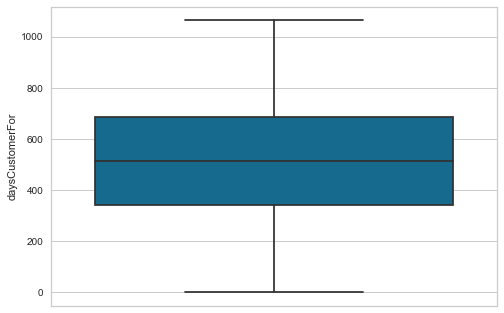

In [19]:
sns.boxplot( y=df["daysCustomerFor"] );
plt.show()

In [20]:
# we create masks with quantile method to filter out data and categorise them
masknew = df["daysCustomerFor"] <= df["daysCustomerFor"].quantile(0.3)
maskold = df["daysCustomerFor"] > df["daysCustomerFor"].quantile(0.3)
df.loc[masknew, "Cust_Seniority"] = "New"
df.loc[maskold, "Cust_Seniority"] = "Old"
df["Cust_Seniority"].value_counts() # we display the New and Old value counts

Old    1566
New     674
Name: Cust_Seniority, dtype: int64

### Dropping redundant columns from dataset.`

In [21]:
df.drop(["ID", "Dt_Customer", "Kidhome", "Teenhome",'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', "Z_CostContact", "Z_Revenue", "Year_Birth"], axis=1, inplace=True)

In [22]:
df.head()

Age Education Marital_Status   Income  Children  daysCustomerFor  Recency  \
0   65        UG         Single  58138.0         0              971       58   
1   68        UG         Single  46344.0         2              125       38   
2   57        UG        Married  71613.0         0              472       26   
3   38        UG        Married  26646.0         1               65       26   
4   41        PG        Married  58293.0         1              321       94   

   Wines  Fruits  Meat  Fish  Sweets  Total_Spent  Gold  NumDealsPurchases  \
0    635      88   546   172      88         1617    88                  3   
1     11       1     6     2       1           27     6                  2   
2    426      49   127   111      21          776    42                  1   
3     11       4    20    10       3           53     5                  2   
4    173      43   118    46      27          422    15                  5   

   NumWebPurchases  NumCatalogPurchases  PurchaseNum  NumStorePurchases  \
0                8                   10           22                  4   
1                1                    1            4                  2   
2                8                    2           20                 10   
3                2                    0            6                  4   
4                5                    3           14                  6   

   NumWebVisitsMonth  Total_campaigns_accepted  Complain Cust_Seniority  
0                  7                         1         0            Old  
1                  5                         0         0            New  
2                  4                         0         0            Old  
3                  6                         0         0            New  
4                  5                         0         0            New

In [23]:
df['Marital_Status'].value_counts()

Married    1444
Single      796
Name: Marital_Status, dtype: int64

In [24]:
df.groupby('Education')['Income'].describe().round(2)

count      mean       std     min       25%      50%       75%  \
Education                                                                    
PG          856.0  54713.33  20351.60  4023.0  38942.50  53565.0  68131.50   
UG         1384.0  50706.98  27435.69  1730.0  31922.75  50059.0  68358.75   

                max  
Education            
PG         162397.0  
UG         666666.0

In [25]:
df.groupby('Education')['Total_Spent'].describe().round(2)

count    mean     std  min    25%    50%      75%     max
Education                                                            
PG          856.0  646.20  619.64  8.0  86.75  425.5  1092.00  2525.0
UG         1384.0  580.81  590.08  5.0  64.00  340.0  1008.25  2524.0

### Pair Plot

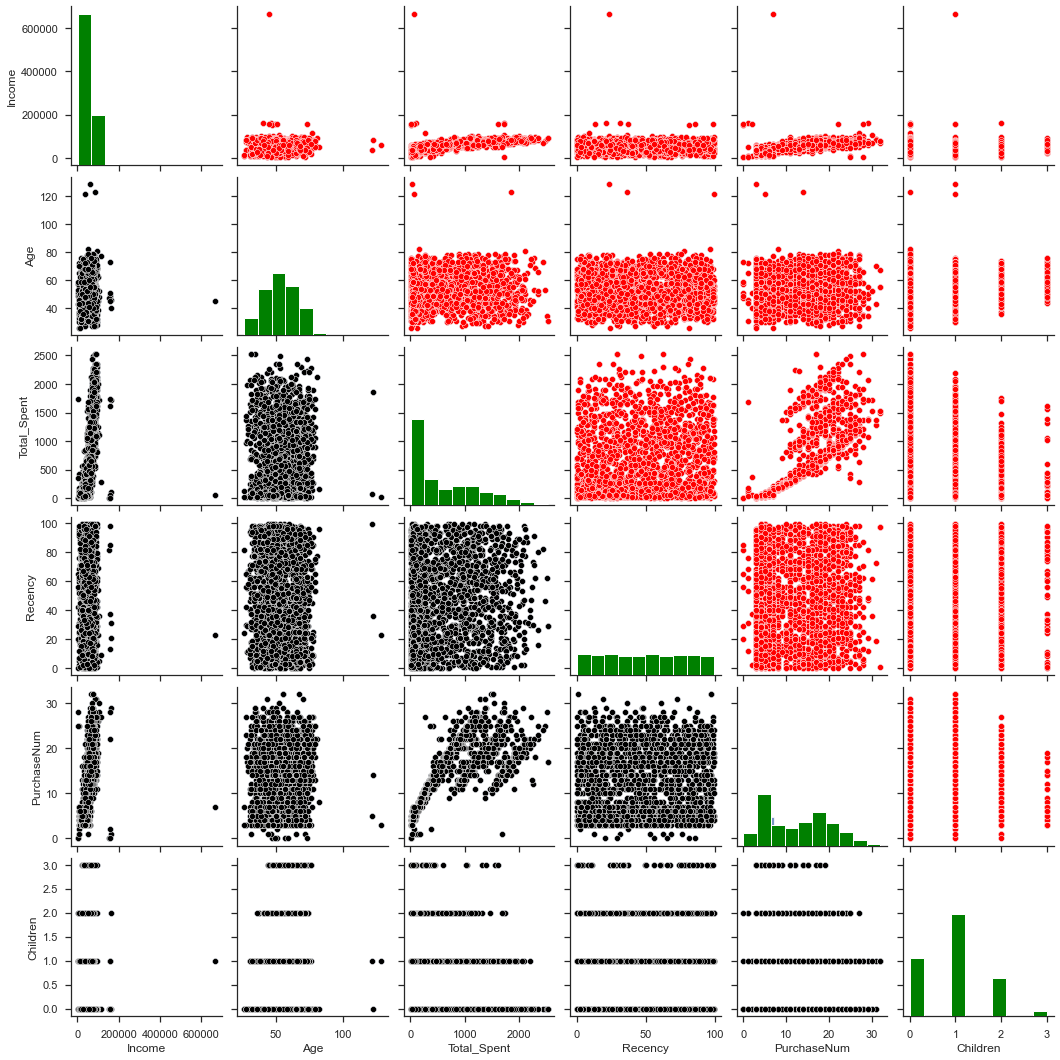

In [26]:
cols_to_plot = ["Income", "Age", "Total_Spent", "Recency", "PurchaseNum", "Children"]
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[cols_to_plot])
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='black')
g.map_diag(plt.hist, color='green')

### Ploting Each Variable

In [27]:
#cols_to_plot.remove("Children")

for col in cols_to_plot:
    fig = px.histogram(df,x=col,title=col,marginal='histogram')
    fig.show()


import plotly.express as px
fig = px.histogram(df, x="Children",color= df['Children'].tolist())
fig.show()

### Visualizing the linear correlations between variables using Heatmap Visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.

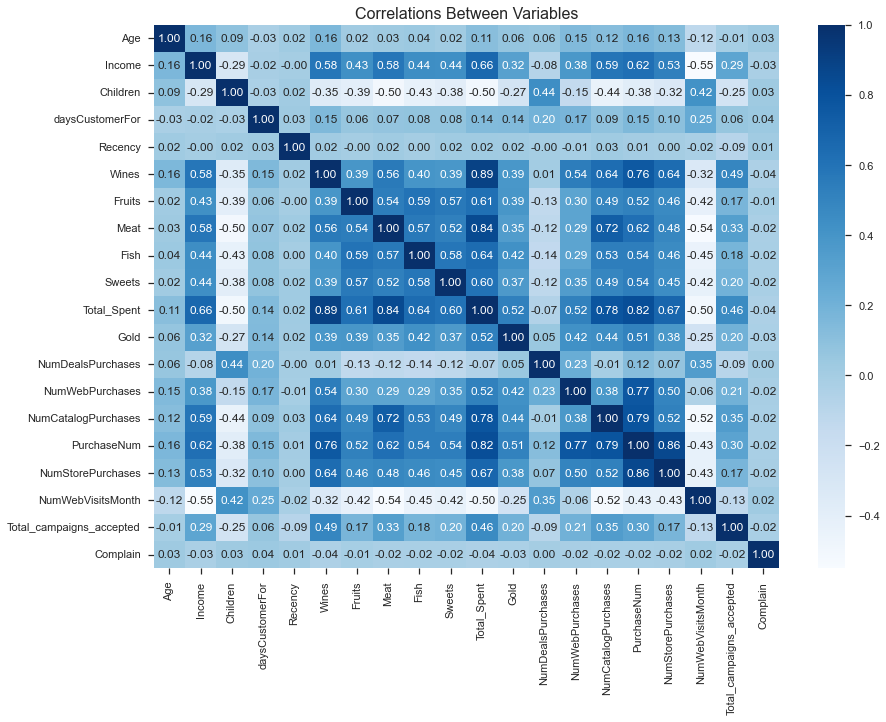

In [28]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

## Data PreProcessing

### One-Hot Encoding

In [29]:
X = df

cat_cols = X.select_dtypes(["object"]).columns
X = pd.get_dummies(X, columns=cat_cols)

In [30]:
X.head()

Age   Income  Children  daysCustomerFor  Recency  Wines  Fruits  Meat  \
0   65  58138.0         0              971       58    635      88   546   
1   68  46344.0         2              125       38     11       1     6   
2   57  71613.0         0              472       26    426      49   127   
3   38  26646.0         1               65       26     11       4    20   
4   41  58293.0         1              321       94    173      43   118   

   Fish  Sweets  Total_Spent  Gold  NumDealsPurchases  NumWebPurchases  \
0   172      88         1617    88                  3                8   
1     2       1           27     6                  2                1   
2   111      21          776    42                  1                8   
3    10       3           53     5                  2                2   
4    46      27          422    15                  5                5   

   NumCatalogPurchases  PurchaseNum  NumStorePurchases  NumWebVisitsMonth  \
0                   10           22                  4                  7   
1                    1            4                  2                  5   
2                    2           20                 10                  4   
3                    0            6                  4                  6   
4                    3           14                  6                  5   

   Total_campaigns_accepted  Complain  Education_PG  Education_UG  \
0                         1         0             0             1   
1                         0         0             0             1   
2                         0         0             0             1   
3                         0         0             0             1   
4                         0         0             1             0   

   Marital_Status_Married  Marital_Status_Single  Cust_Seniority_New  \
0                       0                      1                   0   
1                       0                      1                   1   
2                       1                      0                   0   
3                       1                      0                   1   
4                       1                      0                   1   

   Cust_Seniority_Old  
0                   1  
1                   0  
2                   1  
3                   0  
4                   0

### Standarization

In [31]:
num_cols = X.columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [32]:
X.head()

Age    Income  Children  daysCustomerFor   Recency     Wines  \
0  0.985345  0.235696 -1.264505         1.976745  0.307039  0.983781   
1  1.235733 -0.235454  1.396361        -1.667011 -0.383664 -0.870479   
2  0.317643  0.773999 -1.264505        -0.172468 -0.798086  0.362723   
3 -1.268149 -1.022355  0.065928        -1.925433 -0.798086 -0.870479   
4 -1.017761  0.241888  0.065928        -0.822831  1.550305 -0.389085   

     Fruits      Meat      Fish    Sweets  Total_Spent      Gold  \
0  1.551577  1.679702  2.462147  1.476500     1.679417  0.843207   
1 -0.636301 -0.713225 -0.650449 -0.631503    -0.961275 -0.729006   
2  0.570804 -0.177032  1.345274 -0.146905     0.282673 -0.038766   
3 -0.560857 -0.651187 -0.503974 -0.583043    -0.918094 -0.748179   
4  0.419916 -0.216914  0.155164 -0.001525    -0.305254 -0.556446   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  PurchaseNum  \
0           0.349414         1.409304             2.510890     1.313544   
1          -0.168236        -1.110409            -0.568720    -1.185022   
2          -0.685887         1.409304            -0.226541     1.035926   
3          -0.168236        -0.750450            -0.910898    -0.907403   
4           1.384715         0.329427             0.115638     0.203070   

   NumStorePurchases  NumWebVisitsMonth  Total_campaigns_accepted  Complain  \
0          -0.550785           0.693904                  0.621248 -0.097282   
1          -1.166125          -0.130463                 -0.501912 -0.097282   
2           1.295237          -0.542647                 -0.501912 -0.097282   
3          -0.550785           0.281720                 -0.501912 -0.097282   
4           0.064556          -0.130463                 -0.501912 -0.097282   

   Education_PG  Education_UG  Marital_Status_Married  Marital_Status_Single  \
0     -0.786446      0.786446               -1.346874               1.346874   
1     -0.786446      0.786446               -1.346874               1.346874   
2     -0.786446      0.786446                0.742460              -0.742460   
3     -0.786446      0.786446                0.742460              -0.742460   
4      1.271543     -1.271543                0.742460              -0.742460   

   Cust_Seniority_New  Cust_Seniority_Old  
0           -0.656046            0.656046  
1            1.524284           -1.524284  
2           -0.656046            0.656046  
3            1.524284           -1.524284  
4            1.524284           -1.524284

## Principal Component Analysis

#### Principal Component Analysis is an unsupervised statistical technique used for Dimensionality Reduction. It combines the correlated features, creates the same number of features which are uncorrelated to one another and compresses most of the information (variance) into the first components. Hence, it helps us to handle the Multicollinearity which affects the ML models in a bad way.

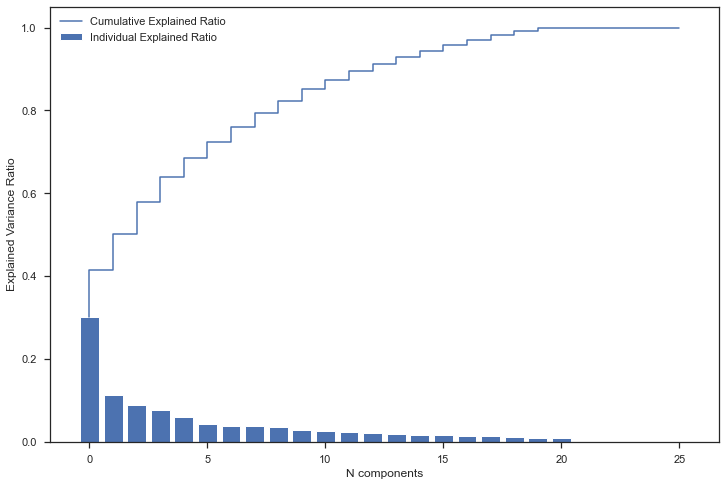

In [33]:
pca = PCA()
pca.fit(X)

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

#### Let's select and visualize the first 3 component

In [34]:
pca = PCA(n_components = 3)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X), columns=["col1", "col2", "col3"])

## Clustering The Dataset

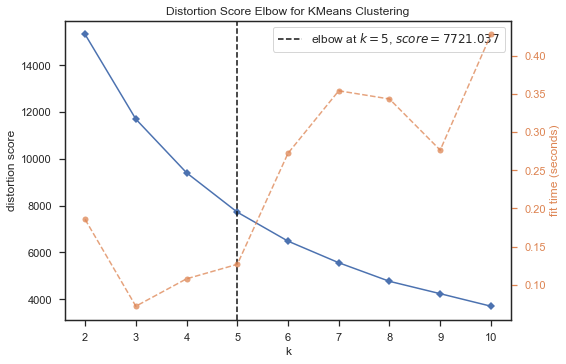

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

### It can be easily seen that the optimal value for "n_clusters" parameter is 5. 

In [36]:
kmeans = KMeans(n_clusters=5, random_state=42)
predictions = kmeans.fit_predict(X_pca)

### Plotting the Clusters Using 3 Dimensions

In [37]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(X_pca, x="col1", y="col2", z="col3", color=predictions, title=f"Total Explained Variance: {total_var:.2f}%")
fig.show()

### Total explained variance for the first 3 components is 57.01%. So, I opt to select the first 7 components because they approximately 75% of the information present in data.

In [38]:
pca = PCA(n_components = 7)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X), columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7"])

In [39]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)

72.28182027586077


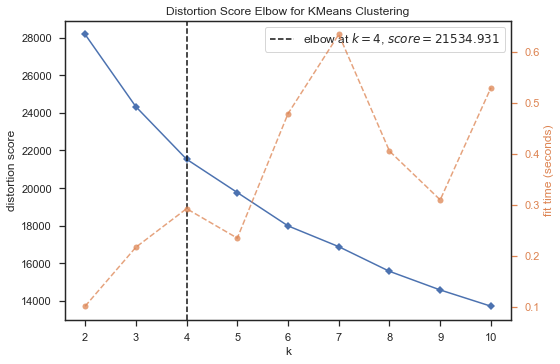

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

In [41]:
kmeans = KMeans(n_clusters=5, random_state=42)
predictions = kmeans.fit_predict(X_pca)

df["Clusters"] = predictions

In [42]:
df.head(10)

Age Education Marital_Status   Income  Children  daysCustomerFor  Recency  \
0   65        UG         Single  58138.0         0              971       58   
1   68        UG         Single  46344.0         2              125       38   
2   57        UG        Married  71613.0         0              472       26   
3   38        UG        Married  26646.0         1               65       26   
4   41        PG        Married  58293.0         1              321       94   
5   55        PG        Married  62513.0         1              453       16   
6   51        UG         Single  55635.0         1              753       34   
7   37        PG        Married  33454.0         1              488       32   
8   48        PG        Married  30351.0         1              548       19   
9   72        PG        Married   5648.0         2              268       68   

   Wines  Fruits  Meat  Fish  Sweets  Total_Spent  Gold  NumDealsPurchases  \
0    635      88   546   172      88         1617    88                  3   
1     11       1     6     2       1           27     6                  2   
2    426      49   127   111      21          776    42                  1   
3     11       4    20    10       3           53     5                  2   
4    173      43   118    46      27          422    15                  5   
5    520      42    98     0      42          716    14                  2   
6    235      65   164    50      49          590    27                  4   
7     76      10    56     3       1          169    23                  2   
8     14       0    24     3       3           46     2                  1   
9     28       0     6     1       1           49    13                  1   

   NumWebPurchases  NumCatalogPurchases  PurchaseNum  NumStorePurchases  \
0                8                   10           22                  4   
1                1                    1            4                  2   
2                8                    2           20                 10   
3                2                    0            6                  4   
4                5                    3           14                  6   
5                6                    4           20                 10   
6                7                    3           17                  7   
7                4                    0            8                  4   
8                3                    0            5                  2   
9                1                    0            1                  0   

   NumWebVisitsMonth  Total_campaigns_accepted  Complain Cust_Seniority  \
0                  7                         1         0            Old   
1                  5                         0         0            New   
2                  4                         0         0            Old   
3                  6                         0         0            New   
4                  5                         0         0            New   
5                  6                         0         0            Old   
6                  6                         0         0            Old   
7                  8                         0         0            Old   
8                  9                         1         0            Old   
9                 20                         1         0            New   

   Clusters  
0         3  
1         4  
2         3  
3         4  
4         4  
5         0  
6         0  
7         2  
8         2  
9         4

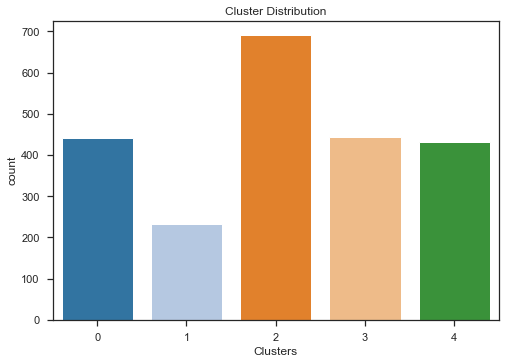

In [43]:
# we check the cluster counts
sns.countplot(data=df, x="Clusters", palette="tab20")
plt.title("Cluster Distribution")
plt.xlabel("Clusters")
plt.show()

## Customer Personality Analysis

In [44]:
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

cluster0_num = df[df["Clusters"]==0].shape[0]
cluster1_num = df[df["Clusters"]==1].shape[0]
cluster2_num = df[df["Clusters"]==2].shape[0]
cluster3_num = df[df["Clusters"]==3].shape[0]
cluster4_num = df[df["Clusters"]==4].shape[0]
values = [cluster0_num, cluster1_num, cluster2_num, cluster3_num,cluster4_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4, title="Clusters")])
fig.show()

### Observations 
* Cluster 1 takes up the huge part of data
* Cluster 3 takes up the least space.

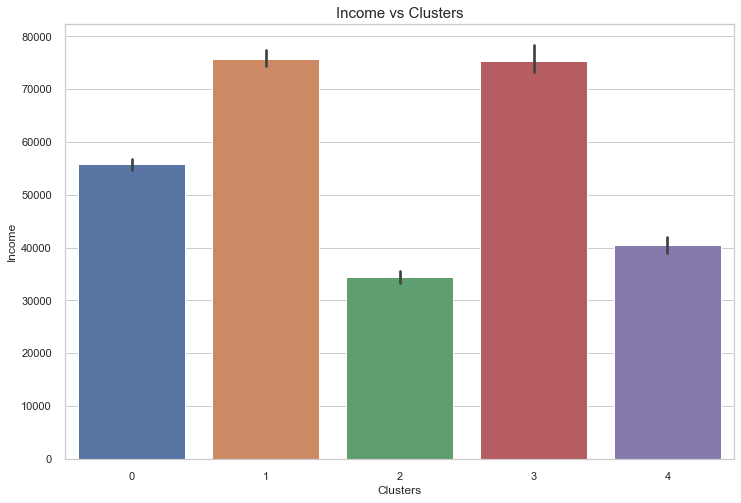

In [45]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Income"])
plt.title("Income vs Clusters", size=15)
plt.show()

## Observations:

* The cluster which has the highest income is Cluster 2
* Income of Cluster 1 is relatively lower than incomes of other clusters

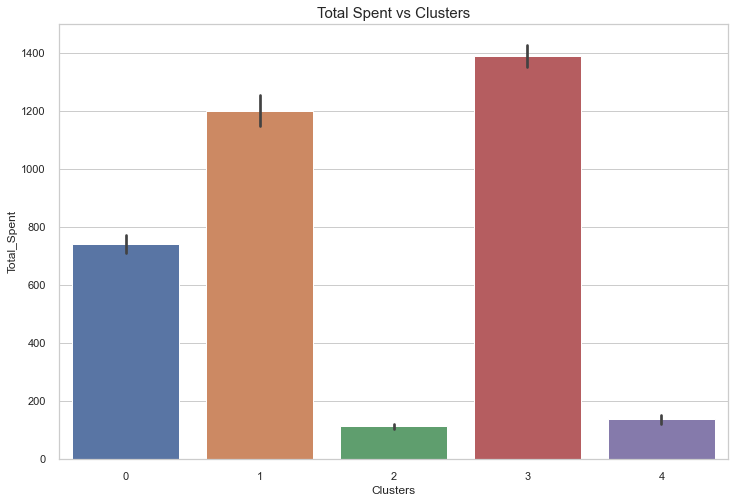

In [46]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Total_Spent"])
plt.title("Total Spent vs Clusters", size=15)
plt.show()

## Observations:

* Cluster 1 is spending the least money
* Cluster 2 is the cluster that spends the most money among other clusters

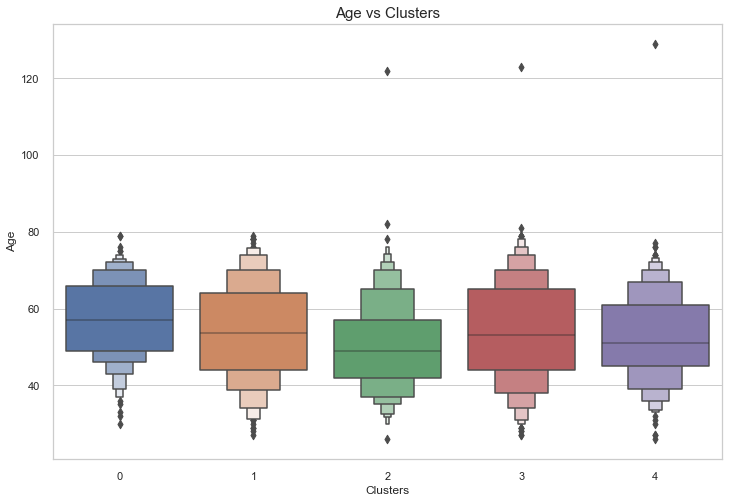

In [47]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["Age"])
plt.title("Age vs Clusters", size=15)
plt.show()

## Observations:

* Cluster 1 includes mostly youngest people (42-58 with the median around 48)
* The oldest cluster is Cluster 0 (51-66)
* Cluster 2 mainly includes middle-aged customers (41-65 with the median around 52)

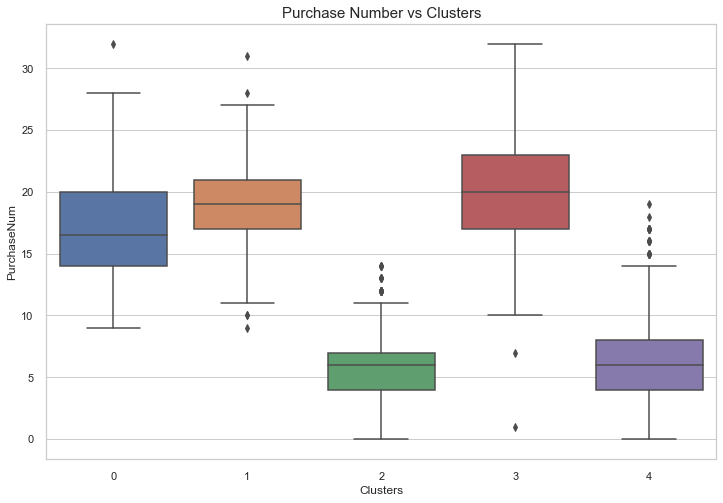

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["PurchaseNum"])
plt.title("Purchase Number vs Clusters", size=15)
plt.show()

## Observations:

* Cluster 2 has the highest purchase number
* Cluster 1 does the least shopping

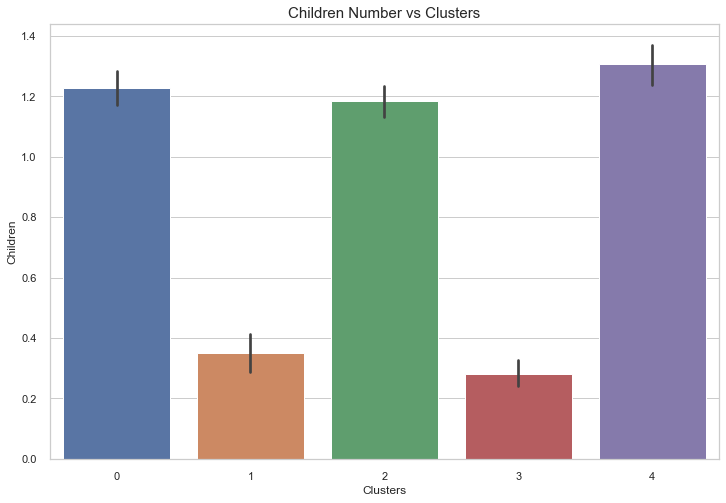

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Children"])
plt.title("Children Number vs Clusters", size=15)
plt.show()

## Observations:

* Cluster 2 has nearly no child
* Cluster 4 has the most children among other clusters

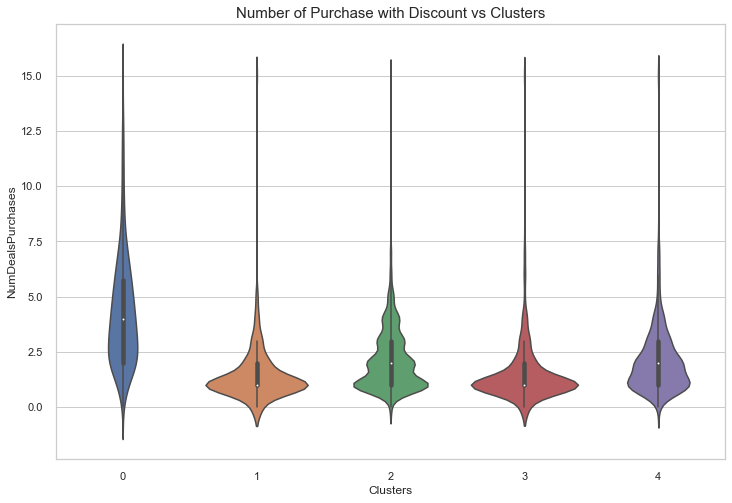

In [50]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=df["Clusters"], y=df["NumDealsPurchases"])
plt.title("Number of Purchase with Discount vs Clusters", size=15)
plt.show()

## Observations:

* Cluster 2 benefits least from the discounts
* Cluster 4 has the highest number of purchase with discount

Text(0.5, 1.0, 'Customer complained in the last 2 years')

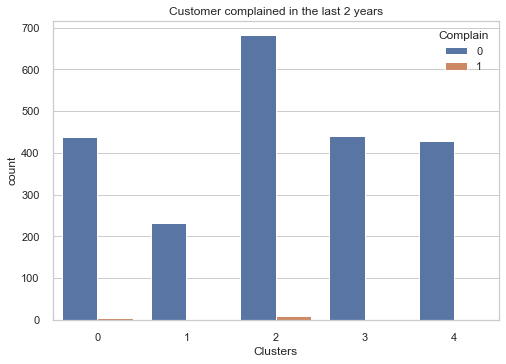

In [51]:
sns.countplot(x='Clusters',hue='Complain',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Customer complained in the last 2 years")

### Observation:
* Almost no one complain in last two years.

## ----------------------------------------------------Conclusion-------------------------------------------------------------

### Cluster 0:

* Is the oldest cluster

### Cluster 1:

* Is the youngest cluster
* Is least-earner
* Has a tendecy to spend less money
* Has least purchase number (shop-hater)

### Cluster 2:

* Has the highest income
* Spends the most money
* Has the highest purchase number (shop-lover)
* Has the least number of children
* Is the one that benefits least from discounts

### Cluster 3:

* Has the second highest income
* Spends most of money
* 50% of people are between 42-52 age
* Least number of children

### Cluster 4:

* Has most children
* Is the cluster that shops most when there is a discount

In [52]:
df.to_csv("Clean_data.csv", sep='\t')